<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_010_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Load & Preprocess Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import (load_data_from_url, clean_column_names, remove_id_column, rename_pay_columns, rename_bill_and_payment_columns,
                             label_pay_columns, convert_pay_columns_to_ordinal, reorder_columns, convert_education_to_ordinal, process_sex_column,
                             process_marriage_column, convert_ordinal_to_category, check_column_integrity, validate_data_types,
                             check_categorical_order, primary_columns, bill_columns, pay_columns, ordinal_columns)
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'marriage']
target = 'default_payment_next_month'

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            # Include the target column from the start
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)
            df = process_marriage_column(df)
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            # Drop duplicates consistently across both features and target
            df = df.drop_duplicates()

            logging.info("Data loaded and preprocessed successfully.")
            return df
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None
    return None

# Now, load the data
df = load_and_preprocess_data(url, categorical_columns, target)

if df is not None:
    # Ensure the target column is treated as a categorical variable
    df[target] = df[target].astype('category')

    # Print data overview
    data_overview(df)

    # Drop duplicate rows (optional if you didn’t remove them earlier)
    df = df.drop_duplicates()

    # Confirm the duplicates are removed
    print(f"Number of Duplicate Rows After Dropping: {df.duplicated().sum()}")

    # List of columns to check
    pay_cols = [col for col in df.columns if col.startswith('pay_delay')]

    # Check the order of categorical columns
    check_categorical_order(df, categorical_columns + pay_cols)
else:
    print("Error loading and preprocessing data.")


Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

In [2]:
print(df['education'].cat.codes.unique())
print(df['education'].unique())

[2 3 1 0]
['University', 'Graduate School', 'High School', 'Other/Unknown']
Categories (4, object): ['Other/Unknown' < 'High School' < 'University' < 'Graduate School']


### Distributions Visualization - Categorical Data

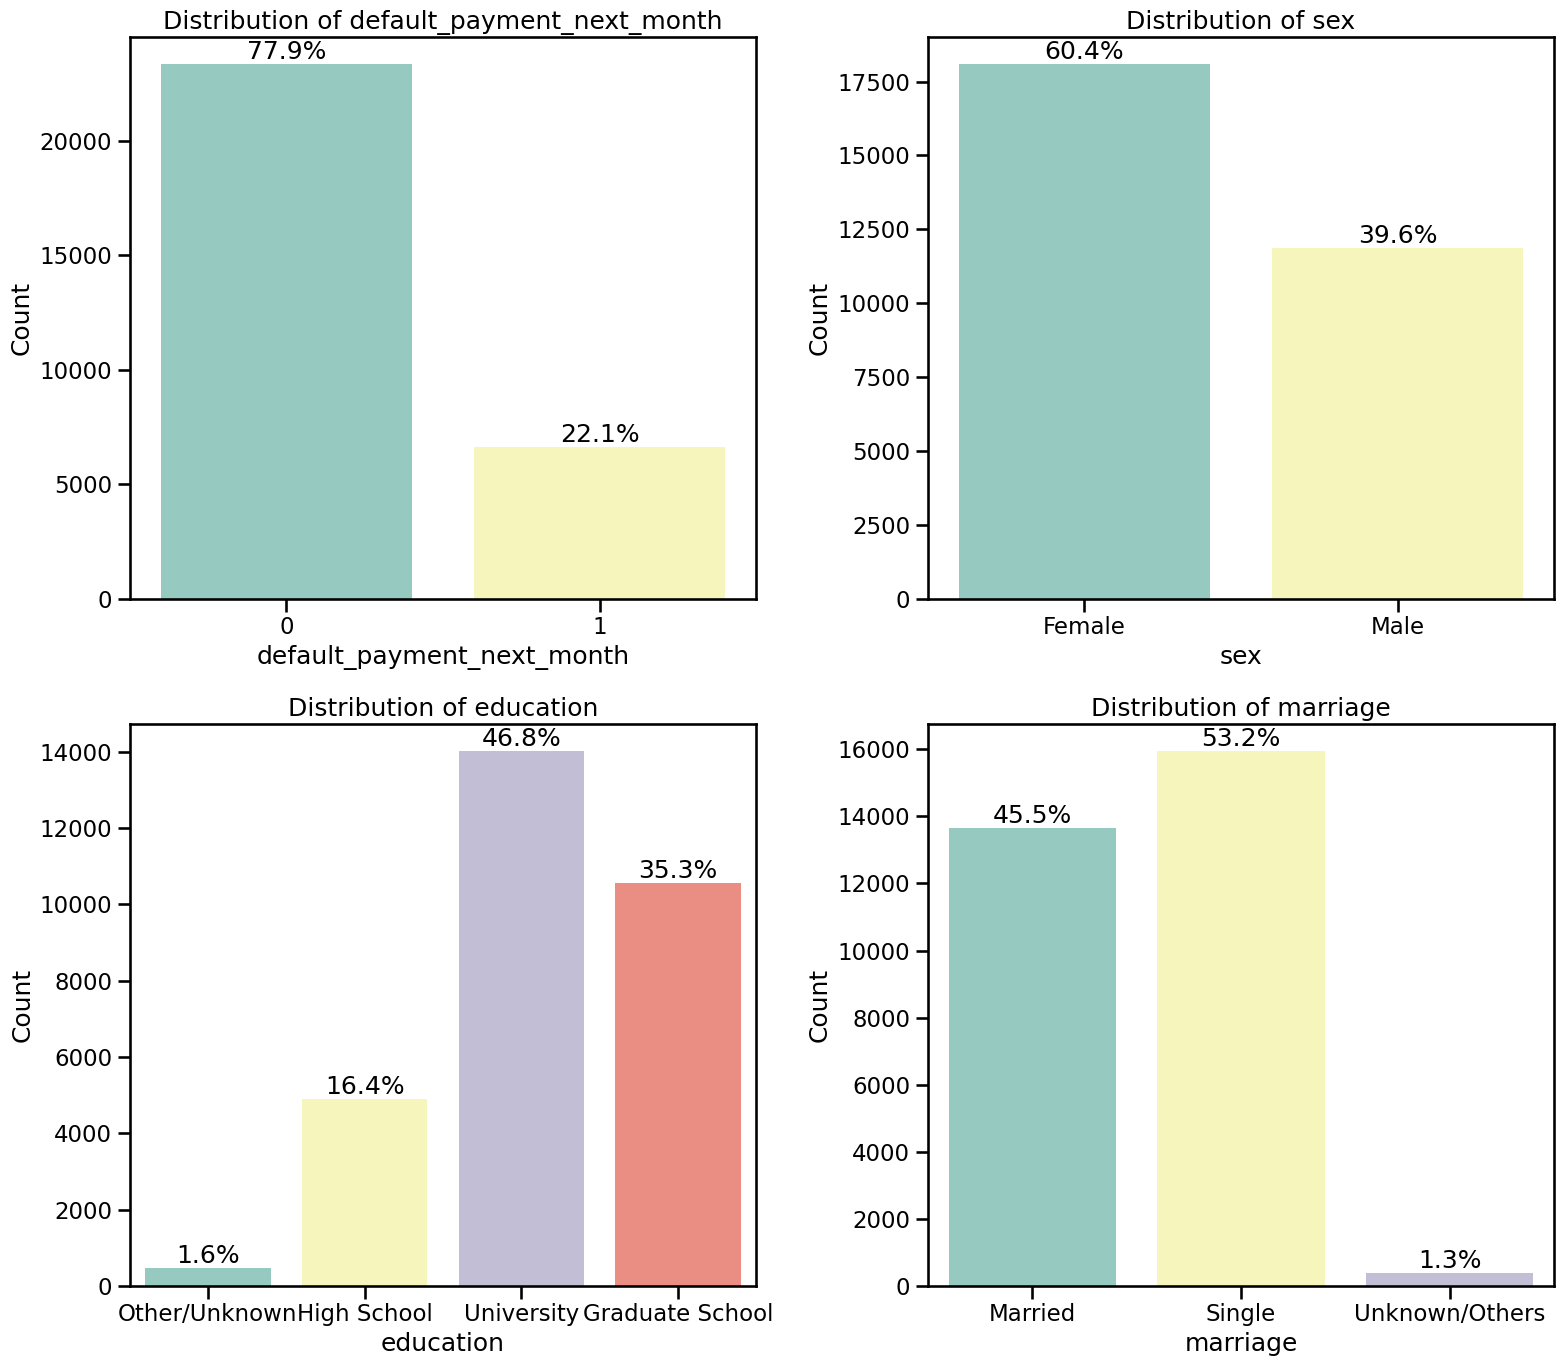

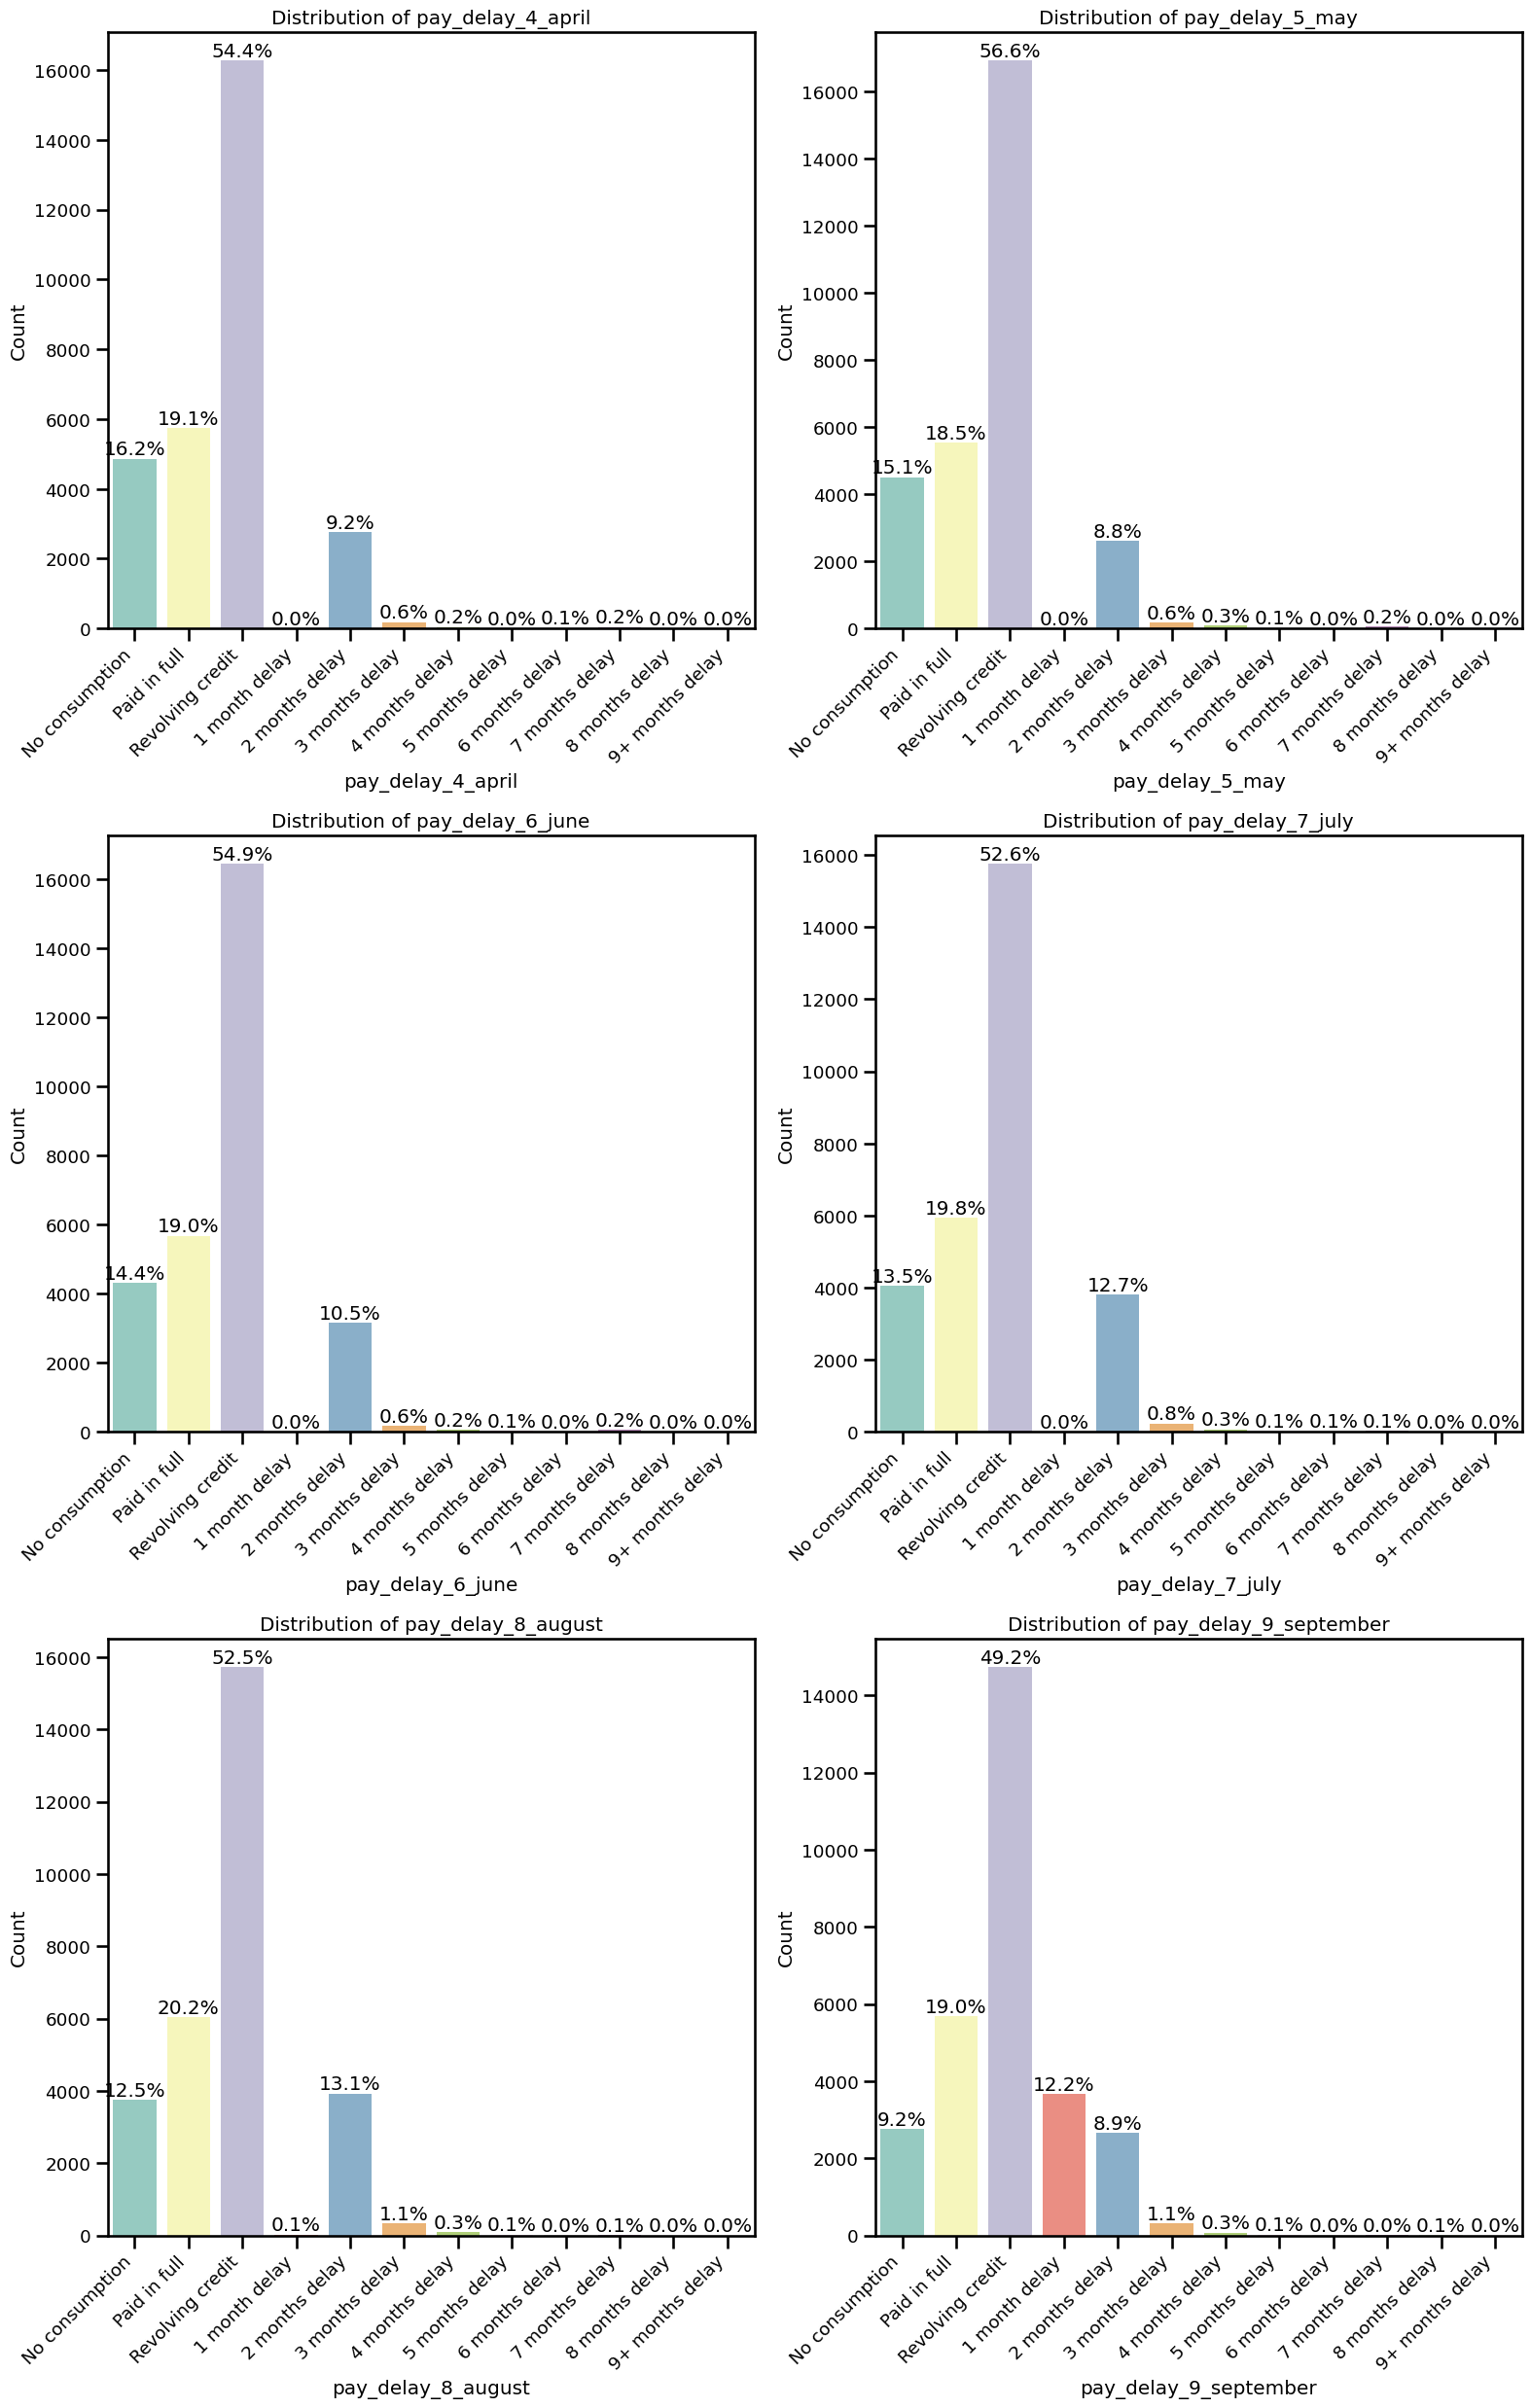

In [3]:
from categorical_data_utils import (categorical_columns, ordinal_columns,
        plot_categorical_distributions, plot_ordinal_distributions)

# Run the plotting functions
plot_categorical_distributions(df, categorical_columns)
plot_ordinal_distributions(df, ordinal_columns)

### Resamling Methods

### **1. Meaningful Features for Resampling:**
- **Balanced Representation:** Resampling on raw data might oversample or undersample based on incomplete or uninformative features. By applying feature engineering first, you ensure that the synthetic samples generated through resampling are based on the most informative and relevant features.
- **Better Synthetic Data:** Techniques like SMOTE, which generate synthetic samples, rely on the feature space to create new data points. Having meaningful and engineered features ensures that the synthetic samples are more realistic and informative.

### **2. Preserving Data Integrity:**
- **Avoiding Redundancy:** If you resample before feature engineering, the synthetic samples may not fully capture the nuances of the data, leading to less effective feature engineering. In contrast, when resampling is done after feature engineering, the balance in the dataset reflects the most accurate and comprehensive representation of the data.

### **3. Optimizing Model Performance:**
- **Improved Generalization:** Resampling after feature engineering ensures that the model sees a balanced dataset with the most informative features. This can help improve the model’s ability to generalize, especially in cases of class imbalance.
- **Avoiding Feature Bias:** If you resample before feature engineering, the resampled data might introduce bias in the engineered features. Performing feature engineering first reduces this risk.

### **4. Maintaining Consistency in Data Processing:**
- **Consistent Data Flow:** By placing resampling after feature engineering, you maintain a consistent flow in your data pipeline. The data is cleaned, features are engineered, and then balanced, which can simplify debugging and ensure that each step is working on the most accurate data possible.

### **Conclusion:**
Applying resampling after feature engineering is a sound strategy and aligns well with the goal of maximizing model performance while maintaining data integrity. It ensures that your resampling technique works with the most informative features, leading to better-balanced data that will likely improve the model's predictive power.

### Process Categorical Data

#### Pipeline Processing Limitations:
When using `OneHotEncoder` with `handle_unknown='ignore'`, any unknown categories in the `sex` or `marriage` columns would be encoded as all zeros. This could inadvertently cause the model to interpret unknown values as "female" for `sex` and "married" for `marriage`, potentially leading to misclassification.

#### Category Code Adjustment:
To avoid this, we adjusted the category codes for `sex` and `marriage` to start from `1`, reserving `0` for unknown categories:
- **`sex`**: Male is encoded as `1`, Female as `2`, with unknowns as `0`.
- **`marriage`**: Single is `1`, Married `2`, and Others `3`, with unknowns as `0`.

This adjustment ensures that unknown categories are clearly distinguished from valid categories, improving the robustness of the model.

For ordinal columns where order matters (e.g., education levels), we handle unknowns by assigning them a category of `-1`. This approach maintains clarity and prevents misinterpretation during model training.

In [4]:
print('Current Cat Codes for Sex:', df['sex'].cat.codes.unique())
print('Current Cat Codes for Marriage:', df['marriage'].cat.codes.unique())

# Adjust category codes manually by adding 1 to the existing codes
df['sex'] = df['sex'].cat.codes + 1
df['marriage'] = df['marriage'].cat.codes + 1

# Recast the adjusted columns back to 'category' dtype with 0 for unknowns
df['sex'] = pd.Categorical(df['sex'], categories=[0, 1, 2], ordered=False)
df['marriage'] = pd.Categorical(df['marriage'], categories=[0, 1, 2, 3], ordered=False)

# Confirm the unique category codes
print('Cat Codes after Recoding - Sex:', df['sex'].cat.codes.unique())  # Output: [1 2]
print('Cat Codes after Recoding - Marriage:', df['marriage'].cat.codes.unique())  # Output: [1 2 3]

Current Cat Codes for Sex: [0 1]
Current Cat Codes for Marriage: [0 1 2]
Cat Codes after Recoding - Sex: [1 2]
Cat Codes after Recoding - Marriage: [1 2 3]


## Pipeline - Baseline - No Resampling

### Otlier Removal Before Feature Engineering
Removing outliers before feature engineering can be a good strategy, especially if your feature engineering processes rely on the distribution of the data. Here are some reasons why this approach can be beneficial:

### **1. Improved Feature Quality:**
- **Reduced Noise:** Outliers can skew the creation of new features, leading to less meaningful or distorted features. By removing outliers first, your engineered features will better represent the majority of the data, potentially leading to more informative features.
- **More Robust Models:** Features created after outlier removal are less likely to be affected by extreme values, which can help the model generalize better on unseen data.

### **2. Enhanced Model Performance:**
- **Generalization:** As you mentioned, removing outliers beforehand can help the model generalize better. Outliers can introduce noise that affects both the engineered features and the model’s ability to learn meaningful patterns.
- **Avoiding Overfitting:** Outliers can cause the model to overfit by focusing too much on these extreme cases. By removing them early, the model is more likely to focus on the general trend of the data rather than on anomalies.

### **3. Simplified Engineering:**
- **More Predictable Features:** Feature engineering on data without outliers may produce more predictable and consistent results, making it easier to debug and understand the features you’re generating.

### **4. Order of Operations:**
- **Outlier Removal First:** This is especially important if the feature engineering steps involve aggregations (e.g., averages, sums) or ratios, which can be heavily influenced by outliers.

### **Considerations:**
- **Data Integrity:** Ensure that the method of outlier removal is appropriate for your data and does not remove valid extreme cases that could be important for your model.
- **Evaluation:** Always compare the model’s performance with and without outlier removal to confirm that it is indeed helping.

### **Conclusion:**
Overall, removing outliers before feature engineering is a sound approach and can lead to a more robust and generalizable model. Given your goal of improving model performance, this strategy is worth implementing and testing.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from data_transformations_utils import (save_classification_reports)
from feature_engineering_pipeline_utils import (HighRiskDelayFeatureTransformer, SevereDelayCountTransformer, CumulativeDelayTransformer,
                                                SevereDelayPaymentRatioTransformer, AvgPaymentSevereDelaysTransformer, DeferredAndDecreasingPaymentsTransformer,
                                                SevereDeferredAndDecreasingPaymentsTransformer, SevereDeferredAndAnyDecreasingPaymentsTransformer,
                                                TotalPaymentsTransformer, AvgPaymentTransformer, PaymentStdTransformer, WeightedPaymentSumTransformer,
                                                TotalBillsTransformer, DebtToLimitRatioTransformer, EducationMarriageInteractionTransformer, WinsorRobustOutlierRemovalTransformer)

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the columns
numeric_features = ['age', 'limit_bal']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']
categorical_features = ['sex', 'marriage']
ordinal_features = ['education', 'pay_delay_4_april', 'pay_delay_5_may',
                    'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']
delay_columns = ['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']

# Feature Engineering Pipeline
feature_engineering_pipeline = Pipeline(steps=[
    ('high_risk_delay', HighRiskDelayFeatureTransformer(delay_columns=delay_columns)),
    ('severe_delay_count', SevereDelayCountTransformer(delay_columns=delay_columns)),
    ('cumulative_delay', CumulativeDelayTransformer(delay_columns=delay_columns)),
    ('severe_delay_payment_ratio', SevereDelayPaymentRatioTransformer(pay_columns=pay_columns)),
    ('avg_payment_severe_delays', AvgPaymentSevereDelaysTransformer()),
    ('deferred_and_decreasing_payments', DeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    ('severe_deferred_and_decreasing_payments', SevereDeferredAndDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    ('severe_deferred_and_any_decreasing_payments', SevereDeferredAndAnyDecreasingPaymentsTransformer(delay_columns=delay_columns, pay_columns=pay_columns)),
    ('total_payments', TotalPaymentsTransformer(pay_columns=pay_columns)),
    ('avg_payment', AvgPaymentTransformer()),
    ('payment_std', PaymentStdTransformer(pay_columns=pay_columns)),
    ('weighted_payment_sum', WeightedPaymentSumTransformer(pay_columns=pay_columns)),
    ('total_bills', TotalBillsTransformer(bill_columns=bill_columns)),  # First create total bills
    ('debt_to_limit_ratio', DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal')),  # Then create the ratio
    ('education_marriage_interaction', EducationMarriageInteractionTransformer())
])

# Step 1: Outlier Removal Pipeline
outlier_removal_pipeline = Pipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns))
])

# Step 2: Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# We use passthrough here since no transformations are applied to pay_columns before feature engineering
# pay_transformer = 'passthrough'

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        # ('pay', pay_transformer, pay_columns),  # Pass through pay_columns without transformation
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Step 3: Final Pipeline
baseline_pipeline = Pipeline(steps=[
    ('outlier_removal', outlier_removal_pipeline),         # Step 1: Outlier Removal
    ('feature_engineering', feature_engineering_pipeline), # Step 2: Feature Engineering
    ('preprocessor', preprocessor),                        # Step 3: Preprocessing
    ('classifier', LogisticRegression(max_iter=1000))      # Step 4: Model
])

# Train the pipeline
baseline_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_baseline = baseline_pipeline.predict(X_test)
classification_report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)  # Get dict for JSON saving
print("Classification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline))

# Step 3: Save the classification report as 'baseline'
classification_reports = {'baseline': classification_report_baseline}
save_classification_reports(classification_reports, 'classification_reports.json')


Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.62      0.27      0.38      1326

    accuracy                           0.80      5993
   macro avg       0.72      0.61      0.63      5993
weighted avg       0.78      0.80      0.77      5993

Classification reports saved as classification_reports.json


### IMPipelines Rules
Yes, you've got it right! Let's break it down:

### 1. **Pipelines in `IMBPipeline`**:
   - **Not Allowed**: Directly using a `Pipeline` (like `ordinal_transformer`) as a step in an `IMBPipeline` is not allowed. Every step in the `IMBPipeline` needs to be a transformer or an estimator, not another `Pipeline`.

### 2. **`ColumnTransformer` in `IMBPipeline`**:
   - **Allowed**: A `ColumnTransformer` can be used inside an `IMBPipeline` even if the `ColumnTransformer` itself contains `Pipeline` objects for different subsets of features. This is because the `ColumnTransformer` is treated as a single transformer within the `IMBPipeline`.

### 3. **Nesting Pipelines in `ColumnTransformer`**:
   - **Allowed**: You can nest `Pipeline` objects (like `ordinal_transformer`) within a `ColumnTransformer`. This is perfectly fine and a common practice because the `ColumnTransformer` is designed to apply different preprocessing steps to different columns.

### 4. **Summary**:
   - **IMBPipeline Steps**: Every step in an `IMBPipeline` must be a transformer or estimator, not a `Pipeline`.
   - **Pipelines in ColumnTransformer**: Pipelines are allowed within a `ColumnTransformer`, and the `ColumnTransformer` itself can then be used as a step in an `IMBPipeline`.

### Example Recap:

```python
# Step 1: Define a pipeline for a specific subset of features
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Step 2: Use this pipeline within a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Step 3: Use the ColumnTransformer in the IMBPipeline
smote_pipeline = IMBPipeline(steps=[
    ('preprocessor', preprocessor),  # This is allowed
    ('smote', SMOTE(random_state=42)),  # Balancing the data
    ('classifier', LogisticRegression(max_iter=1000))  # Final classification model
])
```

### Key Takeaway:
- **Pipelines directly in IMBPipeline**: **Not Allowed**.
- **Pipelines inside ColumnTransformer**: **Allowed** and then the `ColumnTransformer` can be used in the `IMBPipeline`.
- **ColumnTransformer**: **Allowed** directly in `IMBPipeline`.

### Difference Between `Pipeline` and `ColumnTransformer`:

While both `Pipeline` and `ColumnTransformer` are used to apply transformations, they serve different purposes and are used in different contexts:

### 1. **Pipeline**:
   - **Purpose**: A `Pipeline` is used to chain multiple transformers (or a transformer followed by an estimator) sequentially. Each step in the pipeline is applied to the entire dataset in the order they are listed.
   - **Sequential Processing**: The data flows through each step in sequence. For example, you might first impute missing values, then scale the data, and finally fit a model—all within a single `Pipeline`.
   - **Use Case**: Use a `Pipeline` when you want to apply a series of transformations in a specific order to the entire dataset. It’s particularly useful when your transformations need to be applied sequentially before feeding the data into a model.

   **Example**:
   ```python
   pipeline = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean')),
       ('scaler', StandardScaler()),
       ('classifier', LogisticRegression())
   ])
   ```

### 2. **ColumnTransformer**:
   - **Purpose**: A `ColumnTransformer` allows you to apply different transformers to different subsets of columns (features) in your dataset. This is essential when different types of features require different preprocessing steps.
   - **Parallel Processing**: The `ColumnTransformer` applies the specified transformers to the specified columns in parallel. For example, you might scale numerical features, one-hot encode categorical features, and ordinally encode ordinal features—all in one `ColumnTransformer`.
   - **Use Case**: Use a `ColumnTransformer` when you have multiple types of features that need different preprocessing. It’s ideal for datasets where you want to apply different transformations to different groups of features.

   **Example**:
   ```python
   preprocessor = ColumnTransformer(
       transformers=[
           ('num', StandardScaler(), numeric_features),
           ('cat', OneHotEncoder(), categorical_features),
           ('ord', OrdinalEncoder(), ordinal_features)
       ])
   ```

### Summary of Their Roles:
- **Pipeline**: Sequentially applies transformations to the entire dataset. Think of it as a linear flow where each transformation is dependent on the previous one.
- **ColumnTransformer**: Applies different transformations to different subsets of columns in parallel. Think of it as a way to handle heterogeneous data types within a single framework.

### When to Use Each:
- Use a **`Pipeline`** when you want to chain steps together that apply to the entire dataset, typically ending in a model training step.
- Use a **`ColumnTransformer`** when you need to preprocess different types of data (e.g., numerical vs. categorical) in different ways within the same dataset.

In practice, you often use them together: a `ColumnTransformer` for handling different feature types and a `Pipeline` for chaining those preprocessing steps with model training.

You're correct that the `numeric_transformer`, `categorical_transformer`, and `ordinal_transformer` are pipelines, but they are valid in the context of a `ColumnTransformer` because the `ColumnTransformer` is handling the subset of data that each pipeline is applied to. Let’s clarify why they are allowed as they are and why they don't need to be `ColumnTransformer` objects themselves.

### Why `Pipeline` is Allowed Inside `ColumnTransformer`:
- **Context Matters**: The key here is context. When you use a `Pipeline` inside a `ColumnTransformer`, that `Pipeline` is not being applied directly to the entire dataset but rather to a specific subset of columns (like numerical, categorical, or ordinal features). The `ColumnTransformer` orchestrates the application of these pipelines to the respective subsets of data.
- **Specialization**: The purpose of these `Pipeline` objects within a `ColumnTransformer` is to apply a sequence of transformations specifically designed for those subsets of features. This is a valid and intended use case.

### Should They Be `ColumnTransformer` Instead?
- **Not Necessary**: Each of these pipelines (numeric, categorical, ordinal) is already acting on a specific subset of the data. The `ColumnTransformer` is the structure that allows you to apply these different pipelines to different subsets simultaneously. Turning these into `ColumnTransformer` objects themselves is not necessary because:
  1. They already apply to distinct columns.
  2. A `ColumnTransformer` is only needed when you have multiple different transformations to apply to different subsets of columns within those pipelines.

### Example Clarification:
- **Numeric Transformer**: Applies imputation and scaling to numerical features.
- **Categorical Transformer**: Applies imputation and one-hot encoding to categorical features.
- **Ordinal Transformer**: Applies imputation and ordinal encoding to ordinal features.

These are all **sequential steps** within their respective subsets of data and are best handled by a `Pipeline`. The `ColumnTransformer` then combines these pipelines to process the entire dataset accordingly.

### When to Use a `ColumnTransformer` Inside a `Pipeline`:
- **Multiple Transformations Across Different Subsets**: If within one of your pipelines (say, the `numeric_transformer`), you needed to apply different transformations to different numeric subsets, then you might consider using a `ColumnTransformer` inside that pipeline. However, this is usually over-complicating things unless the subsets require significantly different handling.

### Summary:
- **Current Setup is Correct**: The `numeric_transformer`, `categorical_transformer`, and `ordinal_transformer` as pipelines inside a `ColumnTransformer` are perfectly valid and appropriate.
- **No Need for Additional `ColumnTransformer`**: These steps don’t need to be converted into `ColumnTransformer` objects because they’re already operating on specific subsets of the data through the `ColumnTransformer`.

Your preprocessing setup as it stands is correct and efficient for the task at hand. The `ColumnTransformer` is doing the job of delegating different pipelines to the appropriate columns.

### Preprocessing Data Returns

In [ ]:
# Apply the numeric transformer only to the numeric features
numeric_transformer.fit(X_train[numeric_features])
numeric_transformed = numeric_transformer.transform(X_train[numeric_features])

# Print the output and its type
print("Numeric Transformed Output:")
print(type(numeric_transformed))
print(numeric_transformed[:5])  # Print the first 5 rows


In [ ]:
# Apply the categorical transformer only to the categorical features
categorical_transformer.fit(X_train[categorical_features])
categorical_transformed = categorical_transformer.transform(X_train[categorical_features])

# Print the output and its type
print("Categorical Transformed Output:")
print(type(categorical_transformed))
print(categorical_transformed[:5])  # Print the first 5 rows

In [ ]:
# Apply the ordinal transformer only to the ordinal features
ordinal_transformer.fit(X_train[ordinal_features])
ordinal_transformed = ordinal_transformer.transform(X_train[ordinal_features])

# Print the output and its type
print("Ordinal Transformed Output:")
print(type(ordinal_transformed))
print(ordinal_transformed[:5])  # Print the first 5 rows

## SMOTE Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE
from feature_engineering_pipeline_utils import (HighRiskDelayFeatureTransformer, SevereDelayCountTransformer, CumulativeDelayTransformer,
                                                SevereDelayPaymentRatioTransformer, AvgPaymentSevereDelaysTransformer, DeferredAndDecreasingPaymentsTransformer,
                                                SevereDeferredAndDecreasingPaymentsTransformer, SevereDeferredAndAnyDecreasingPaymentsTransformer,
                                                TotalPaymentsTransformer, AvgPaymentTransformer, PaymentStdTransformer, WeightedPaymentSumTransformer,
                                                TotalBillsTransformer, DebtToLimitRatioTransformer, EducationMarriageInteractionTransformer, WinsorRobustOutlierRemovalTransformer,
                                                CombinedFeatureEngineeringTransformer)

# Define the target
target = 'default_payment_next_month'

# Split the data into features and target
X = df.drop(columns=[target])
y = df[target]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the columns
numeric_features = ['age', 'limit_bal']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']
categorical_features = ['sex', 'marriage']
ordinal_features = ['education', 'pay_delay_4_april', 'pay_delay_5_may',
                    'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']
delay_columns = ['pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june', 'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']

# Step 1: Feature Engineering First
feature_engineering_pipeline = CombinedFeatureEngineeringTransformer(delay_columns, pay_columns, bill_columns)

# Step 2: Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Step 3: Pipeline Setup
smote_pipeline = IMBPipeline(steps=[
    ('outlier_removal', WinsorRobustOutlierRemovalTransformer(columns=pay_columns)),
    ('feature_engineering', feature_engineering_pipeline),
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 4: Train the pipeline
smote_pipeline.fit(X_train, y_train)

# Step 5: Predict and generate the SMOTE classification report
y_pred_smote = smote_pipeline.predict(X_test)
classification_report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Step 6: Save the SMOTE classification report
with open('classification_reports.json', 'r') as json_file:
    classification_reports = json.load(json_file)

classification_reports['smote'] = classification_report_smote

with open('classification_reports.json', 'w') as json_file:
    json.dump(classification_reports, json_file, indent=4)

print("SMOTE classification report has been added to the existing file.")

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4667
           1       0.46      0.57      0.51      1326

    accuracy                           0.76      5993
   macro avg       0.66      0.69      0.67      5993
weighted avg       0.78      0.76      0.77      5993

SMOTE classification report has been added to the existing file.


### Model Comparison - Visualizations

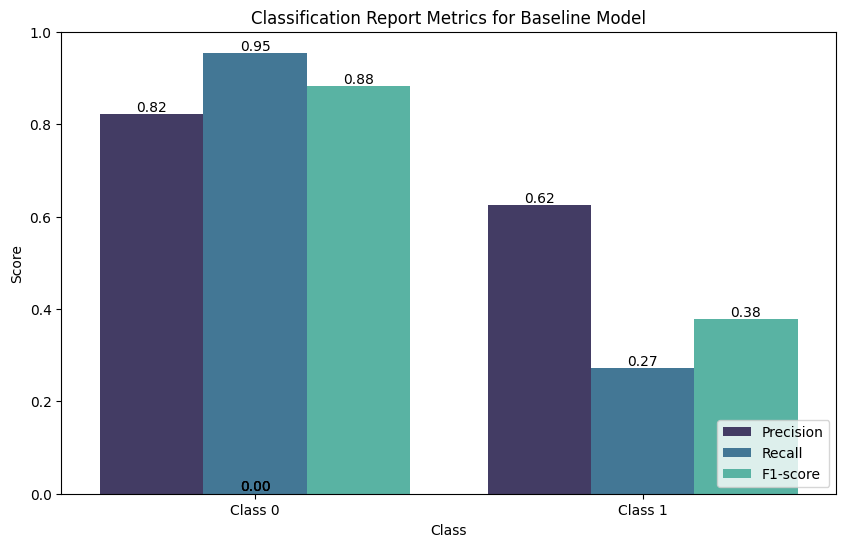

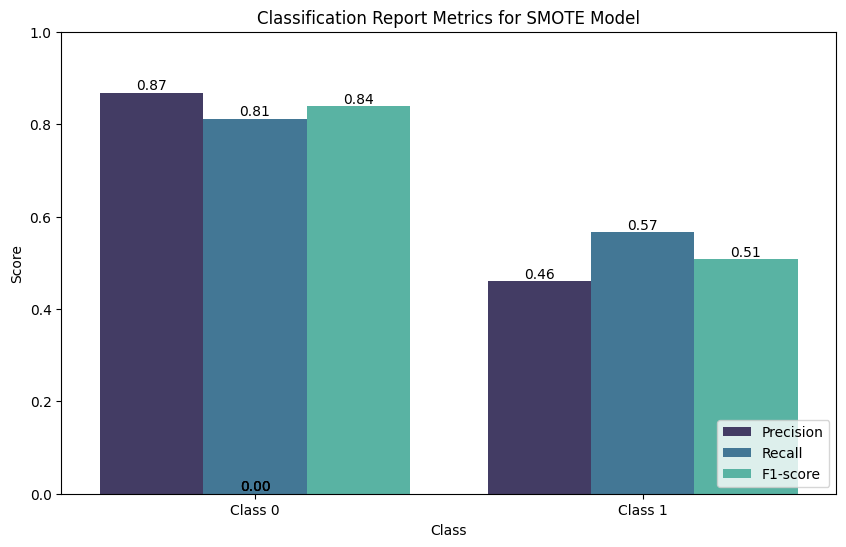

In [24]:
from data_transformations_utils import plot_classification_report_metrics

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the classification reports from the JSON file
with open('classification_reports.json', 'r') as json_file:
    classification_reports = json.load(json_file)

# Step 2: Plot the metrics for the baseline model
plot_classification_report_metrics(classification_reports['baseline'], 'Baseline Model')

# Step 3: Plot the metrics for the SMOTE-enhanced model
plot_classification_report_metrics(classification_reports['smote'], 'SMOTE Model')


In [30]:
def load_and_pivot_classification_reports(json_filename):
    # Step 1: Load the classification reports from the JSON file
    with open(json_filename, 'r') as json_file:
        classification_reports = json.load(json_file)

    # Step 2: Extract relevant metrics for each model
    def extract_metrics(report, model_name):
        data = {
            'Model': model_name,
            'Class 0 Precision': report['0']['precision'],
            'Class 0 Recall': report['0']['recall'],
            'Class 0 F1-score': report['0']['f1-score'],
            'Class 1 Precision': report['1']['precision'],
            'Class 1 Recall': report['1']['recall'],
            'Class 1 F1-score': report['1']['f1-score'],
            'Accuracy': report['accuracy'],
            'Macro Avg Precision': report['macro avg']['precision'],
            'Macro Avg Recall': report['macro avg']['recall'],
            'Macro Avg F1-score': report['macro avg']['f1-score']
        }
        return data

    # Step 3: Extract the metrics for baseline and SMOTE models
    baseline_data = extract_metrics(classification_reports['baseline'], 'Baseline')
    smote_data = extract_metrics(classification_reports['smote'], 'SMOTE')

    # Step 4: Combine the data into a wide-format DataFrame
    df_metrics = pd.DataFrame([baseline_data, smote_data])

    # Step 5: Pivot the DataFrame from wide to long format for better readability
    df_long = pd.melt(df_metrics, id_vars=['Model'],
                      var_name='Metric',
                      value_name='Score')

    return df_long

# Usage
df_long = load_and_pivot_classification_reports('classification_reports.json')
df_long


,Model,Metric,Score
0,Baseline,Class 0 Precision,0.821640
1,SMOTE,Class 0 Precision,0.868011
2,Baseline,Class 0 Recall,0.953503
3,SMOTE,Class 0 Recall,0.811656
4,Baseline,Class 0 F1-score,0.882674
5,SMOTE,Class 0 F1-score,0.838888
6,Baseline,Class 1 Precision,0.623917
7,SMOTE,Class 1 Precision,0.460405
8,Baseline,Class 1 Recall,0.271493
9,SMOTE,Class 1 Recall,0.565611


### Model Comparison - Analysis

### Focus on Class 1 (Loan Defaults):

1. **Class 1 Precision (Loan Defaults)**:
   - **Baseline**: 0.6239
   - **SMOTE**: 0.4604
   - **Interpretation**: Precision measures how many of the predicted Class 1 instances (loan defaults) are actually true positives. In the baseline model, the precision is higher (0.6239), meaning that when the model predicted a loan default, 62% of those predictions were correct. However, after applying SMOTE, precision dropped to 46%, meaning that a higher proportion of false positives occurred in the SMOTE-enhanced model.

2. **Class 1 Recall (Loan Defaults)**:
   - **Baseline**: 0.2715
   - **SMOTE**: 0.5656
   - **Interpretation**: Recall measures how many actual Class 1 instances (loan defaults) were correctly identified. SMOTE significantly improved recall from 27.1% to 56.6%. This indicates that the SMOTE model was able to identify more actual loan defaults (more true positives), which is critical because identifying defaults is a key goal in this context.

3. **Class 1 F1-Score (Loan Defaults)**:
   - **Baseline**: 0.3784
   - **SMOTE**: 0.5076
   - **Interpretation**: The F1-score balances precision and recall. The F1-score for Class 1 improved from 37.8% in the baseline model to 50.8% in the SMOTE model. This shows that, overall, the SMOTE model is performing better in terms of identifying loan defaults, despite the lower precision. The increased recall makes the SMOTE-enhanced model more effective at catching true defaults.

### Overall Analysis:

1. **Class 0 Metrics (Non-defaults)**:
   - While we are primarily focused on Class 1, it's worth noting that the SMOTE model shows a drop in Class 0 recall (from 95.4% to 81.2%) and F1-score (88.3% to 83.9%). This is expected because SMOTE focuses on improving the balance of the minority class (Class 1) by generating synthetic examples, which can lead to slightly worse performance on the majority class (Class 0).

2. **Accuracy**:
   - **Baseline**: 80.3%
   - **SMOTE**: 75.7%
   - **Interpretation**: The SMOTE model has lower overall accuracy, but this is not the most important metric in this case. Since we are focused on improving the detection of loan defaults (Class 1), the drop in accuracy is acceptable, given the improvements in recall and F1-score for Class 1.

3. **Macro Average Metrics**:
   - The macro-averaged precision, recall, and F1-score metrics provide a balance between both classes. The baseline model had higher precision and accuracy, but the SMOTE model improved recall and F1-score. This suggests that SMOTE improved the balance in performance across both classes, particularly benefiting Class 1.

### Key Takeaways:
- **SMOTE Improved Recall for Class 1**: The recall for Class 1 significantly improved from 27% to 57%, which means the model is now better at identifying actual loan defaults.
- **Trade-off in Precision**: The precision for Class 1 decreased, meaning the model is predicting more false positives (incorrectly labeling non-defaults as defaults).
- **Better Overall F1-Score for Class 1**: The overall F1-score for Class 1 improved from 38% to 51%, showing that SMOTE has enhanced the model’s ability to handle imbalanced data.

In summary, **SMOTE successfully improved the model’s ability to detect loan defaults** (Class 1), which is our main objective. However, this came at the cost of precision, meaning the model now produces more false positives. The trade-off is generally acceptable when the primary goal is to catch as many defaults as possible.

#### Loan Data Utils

In [1]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py


#### EDA Utils

In [2]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Data Transform Utils

In [22]:
script_content=r'''

# data_transformations_utils.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import logging

# Function to evaluate the baseline model
def evaluate_baseline_model(preprocessor, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return report

# Function to apply Winsorization (Capping)
def winsorize_transform(X):
    X_transformed = X.copy()
    for col in X_transformed.columns:
        X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])
    return X_transformed

# Function to apply the Combined Method: IQR + Winsorization + Robust Scaling
def combined_outlier_removal(X):
    # Step 1: Apply IQR method to remove outliers
    def apply_iqr_outlier_removal(df):
        df_cleaned = df.copy()
        for col in df_cleaned.columns:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        return df_cleaned

    # Step 2: Apply Winsorization to cap extreme values
    def apply_winsorization(df):
        df_winsorized = df.copy()
        for col in df_winsorized.columns:
            df_winsorized[col] = mstats.winsorize(df_winsorized[col], limits=[0.05, 0.05])
        return df_winsorized

    # Step 3: Apply RobustScaler to normalize the data
    def apply_robust_scaler(df):
        scaler = RobustScaler()
        return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Apply all the steps in sequence
    X_cleaned = apply_iqr_outlier_removal(X)
    X_winsorized = apply_winsorization(X_cleaned)
    X_scaled = apply_robust_scaler(X_winsorized)

    return X_scaled


# Function to create the preprocessing pipeline
def create_preprocessor(ordinal_columns, categorical_columns, numeric_columns, categories_for_encoder):
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories_for_encoder))
            ]), ordinal_columns),

            ('categorical', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
            ]), categorical_columns),

            ('numeric', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_columns)
        ],
        remainder='passthrough'
    )
    return preprocessor

# Function to evaluate models with different transformations
def evaluate_method(preprocessor, X_train, X_test, y_train, y_test, method_name, classification_reports, pay_columns, transformation):
    logging.info(f"Evaluating method: {method_name}")

    # Apply the transformation only to the specified pay_columns
    transformed_train = transformation(X_train[pay_columns])
    transformed_test = transformation(X_test[pay_columns])

    # Replace the original pay columns with the transformed data
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    X_train_transformed[pay_columns] = transformed_train
    X_test_transformed[pay_columns] = transformed_test

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate the model
    pipeline.fit(X_train_transformed, y_train)
    y_pred = pipeline.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Save the report in the dictionary under the method name
    classification_reports[method_name] = report

# Function to save the classification reports to a JSON file
def save_classification_reports(reports, filename='classification_reports.json'):
    with open(filename, 'w') as json_file:
        json.dump(reports, json_file, indent=4)  # Use indent for pretty-printing
    print(f"Classification reports saved as {filename}")

# Log transformation function for pay columns
def log_transform(X, pay_columns):
    X_transformed = X.copy()
    for col in pay_columns:
        # Apply log1p transformation and handle any potential NaN/Inf values
        X_transformed[col] = np.log1p(X_transformed[col].replace([np.inf, -np.inf], np.nan)).fillna(0)
    return X_transformed[pay_columns]

# Plotting function with annotations
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')

    # Annotate the bars with the values
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

'''

with open('data_transformations_utils.py', 'w') as file:
    file.write(script_content)

print("data_transformations_utils.py created successfully")
# Reload script to make functions available for use
import importlib
import data_transformations_utils
importlib.reload(data_transformations_utils)

from data_transformations_utils import *


data_transformations_utils.py created successfully


#### Catgeorical Data Utils Script

In [4]:
script_content = r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe `df` is already loaded

# List of categorical and ordinal columns
categorical_columns = [
    'default_payment_next_month', 'sex', 'education', 'marriage'
]

ordinal_columns = [
    'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
    'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
]

def plot_categorical_distributions(df, categorical_columns):
    """Function to plot categorical distributions."""
    plt.figure(figsize=(16, 14))
    sns.set_context('talk')
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=column, hue=column, palette='Set3', legend=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


def plot_ordinal_distributions(df, ordinal_columns):
    """Function to plot ordinal distributions using barplot with hue."""
    plt.figure(figsize=(16, 25))
    sns.set_context('talk', font_scale=0.8)
    for i, column in enumerate(ordinal_columns, 1):
        plt.subplot(3, 2, i)

        # Get the counts for each category
        category_counts = df[column].value_counts().sort_index()

        sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='Set3')

        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Rotate x-tick labels for better legibility
        plt.xticks(rotation=45, ha='right')

        # Add percentage annotations
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_height() / total
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(),
                           f'{percentage:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


'''

# Write the script to a file
with open("categorical_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to categorical_data_utils.py")
# Reload script to make functions available for use
import importlib
import categorical_data_utils
importlib.reload(categorical_data_utils)

from categorical_data_utils import *


Script successfully written to categorical_data_utils.py


#### Feature Engineering Pipeline Script

In [5]:
script_content = r'''
# feature_engineering_pipeline_utils.py

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import pandas as pd

pay_columns = ['pay_amt_4_april', 'pay_amt_5_may',
               'pay_amt_6_june', 'pay_amt_7_july',
               'pay_amt_8_august', 'pay_amt_9_september',
               'bill_amt_4_april', 'bill_amt_5_may',
               'bill_amt_6_june', 'bill_amt_7_july',
               'bill_amt_8_august', 'bill_amt_9_september']

delay_columns = [
        'pay_delay_4_april', 'pay_delay_5_may', 'pay_delay_6_june',
        'pay_delay_7_july', 'pay_delay_8_august', 'pay_delay_9_september'
    ]


# ------- Outlier Removal Transformer Winsor Robust Returns Pandas DataFrame --------#

class WinsorRobustOutlierRemovalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Apply Winsorization (capping)
        for col in self.columns:
            X_transformed[col] = mstats.winsorize(X_transformed[col], limits=[0.05, 0.05])

        # Apply Robust Scaling
        X_transformed[self.columns] = self.scaler.transform(X_transformed[self.columns])

        # Convert back to DataFrame if X was a DataFrame
        if isinstance(X, pd.DataFrame):
            X_transformed = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)

        return X_transformed

# ------- High Risk Delay Feature Transformer -------#

class HighRiskDelayFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'high_risk_delay' feature
        X['high_risk_delay'] = X[self.delay_columns].apply(
            lambda row: any(delay in ['3 months delay', '4 months delay', '5 months delay',
                                      '6 months delay', '7 months delay', '8 months delay',
                                      '9+ months delay'] for delay in row),
            axis=1
        )

        return X

# ------- Severe Delay Count Transformer -------#

class SevereDelayCountTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_delay_count' feature
        X['severe_delay_count'] = X[self.delay_columns].apply(
            lambda row: sum(1 for delay in row if delay in ['3 months delay', '4 months delay',
                                                            '5 months delay', '6 months delay',
                                                            '7 months delay', '8 months delay',
                                                            '9+ months delay']),
            axis=1
        )

        return X

# ------- Cumulative Delay Transformer -------#

class AvgPaymentSevereDelaysTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # No parameters to initialize for this transformer

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define severe delay categories
        delays = ['3 months delay', '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Calculate the average payment for severe delays
        def calculate_avg_payment_for_severe_delays(row):
            total_payment = 0
            severe_delay_months = 0
            for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
                if row[f'pay_delay_{i+4}_{month}'] in delays:
                    total_payment += row[f'pay_amt_{i+4}_{month}']
                    severe_delay_months += 1
            return total_payment / severe_delay_months if severe_delay_months > 0 else 0

        # Apply the function to each row
        X['avg_payment_severe_delays'] = X.apply(calculate_avg_payment_for_severe_delays, axis=1)

        return X


# ------- Cumulative Delay Transformer -------#

class CumulativeDelayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns):
        self.delay_columns = delay_columns
        self.delay_mapping = {
            'No consumption': 0,
            'Paid in full': 0,
            'Revolving credit': 0,
            '1 month delay': 1,
            '2 months delay': 2,
            '3 months delay': 3,
            '4 months delay': 4,
            '5 months delay': 5,
            '6 months delay': 6,
            '7 months delay': 7,
            '8 months delay': 8,
            '9+ months delay': 9
        }

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'cumulative_delay' feature
        X['cumulative_delay'] = X[self.delay_columns].apply(
            lambda row: sum(self.delay_mapping.get(delay, 0) for delay in row),
            axis=1
        )

        return X


# ------- Severe Delay Payment Ratio Transformer -------#

class SevereDelayPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, scaling_factor=10000):
        self.pay_columns = pay_columns
        self.scaling_factor = scaling_factor

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payment across the specified columns
        X['total_payment'] = X[self.pay_columns].sum(axis=1)

        # Calculate the severe delay payment ratio
        X['severe_delay_payment_ratio'] = X.apply(
            lambda row: (row['severe_delay_count'] / row['total_payment'] * self.scaling_factor)
            if row['total_payment'] > 0 else 0,
            axis=1
        )

        # Drop the temporary 'total_payment' column if desired
        X.drop(columns=['total_payment'], inplace=True)

        return X


# ------- Deferred & Decreasing Payments Transformer -------#

class DeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'deferred_and_decreasing_payments' feature
        X['deferred_and_decreasing_payments'] = X.apply(self._check_deferred_and_decreasing, axis=1)

        return X

    def _check_deferred_and_decreasing(self, row):
        delays = ['1 month delay', '2 months delay', '3 months delay',
                  '4 months delay', '5 months delay', '6 months delay',
                  '7 months delay', '8 months delay', '9+ months delay']

        # Initialize list to store payments in months with any delay
        delay_payments = []

        # Iterate over the months and collect payments for any delay
        for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']):
            if row[f'pay_delay_{i+4}_{month}'] in delays:
                delay_payments.append(row[f'pay_amt_{i+4}_{month}'])

        # Check if payments are decreasing over time
        for j in range(1, len(delay_payments)):
            if delay_payments[j] > delay_payments[j-1]:
                return False  # Payments are not consistently decreasing

        return True if len(delay_payments) > 1 else False  # Return True if payments are decreasing


# ------- Severe Deferred & Decreasing Payments Transformer -------#

class SevereDeferredAndDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_decreasing_payments' feature
        X['severe_deferred_and_decreasing_payments'] = X.apply(self._check_severe_deferred_and_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = all(x >= y for x, y in zip(payments, payments[1:]))

        # Return True if both conditions are met
        return deferred and decreasing


# ------- Severe Deferred & Any Decreasing Payments Transformer -------#

class SevereDeferredAndAnyDecreasingPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Generate the 'severe_deferred_and_any_decreasing_payments' feature
        X['severe_deferred_and_any_decreasing_payments'] = X.apply(self._check_severe_deferred_and_any_decreasing, axis=1)

        return X

    def _check_severe_deferred_and_any_decreasing(self, row):
        delays = ['3 months delay', '4 months delay', '5 months delay',
                  '6 months delay', '7 months delay', '8 months delay', '9+ months delay']

        # Check if there are severe deferred payments
        deferred = any(row[f'pay_delay_{i+4}_{month}'] in delays for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september']))

        # Check if payments are decreasing (any decrease)
        payments = [row[f'pay_amt_{i+4}_{month}'] for i, month in enumerate(['april', 'may', 'june', 'july', 'august', 'september'])]
        decreasing = any(x > y for x, y in zip(payments, payments[1:]))  # Any decrease in payments

        # Return True if both conditions are met
        return deferred and decreasing

# ---------------------------------------------------#
# ---------- Ratio and Interaction Features ---------#
# ---------------------------------------------------#

# ------- Bill To Payment Ratio Transformer -------#

class BillToPaymentRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, month):
        self.month = month

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Define the column names based on the month
        ratio_column = f'bill_to_payment_ratio_{self.month}'
        bill_column = f'bill_amt_{self.month}'
        pay_column = f'pay_amt_{self.month}'

        # Calculate the bill-to-payment ratio
        X[ratio_column] = X[bill_column] / X[pay_column].replace(0, np.nan)
        X[ratio_column] = X[ratio_column].fillna(0)

        return X

# ------- Total Payments Transformer -------#

class TotalPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total payments across the specified columns
        X['total_payments'] = X[self.pay_columns].sum(axis=1)

        return X

# ------- Average Payment Transformer -------#

class AvgPaymentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_payments_column='total_payments', num_months=6):
        self.total_payments_column = total_payments_column
        self.num_months = num_months

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the average payment
        X['avg_payment'] = X[self.total_payments_column] / self.num_months

        return X

# ------- Standard Deviation Transformer -------#

class PaymentStdTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns):
        self.pay_columns = pay_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the standard deviation of payments across the specified columns
        X['payment_std'] = X[self.pay_columns].std(axis=1)

        return X

# ------- Weighted Payment Sum Transformer -------#

class WeightedPaymentSumTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pay_columns, weights=None):
        self.pay_columns = pay_columns
        self.weights = weights if weights is not None else [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]  # Default weights

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the weighted payment sum across the specified columns
        X['weighted_payment_sum'] = (X[self.pay_columns] * self.weights).sum(axis=1)

        # Return the DataFrame with all original columns plus the new feature
        return X



# ------- Debt To Limit Ratio Transformer -------#

class TotalBillsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bill_columns):
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Calculate the total bills across the specified columns
        X['total_bills'] = X[self.bill_columns].sum(axis=1)

        return X


class DebtToLimitRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, total_bills_column='total_bills', limit_bal_column='limit_bal'):
        self.total_bills_column = total_bills_column
        self.limit_bal_column = limit_bal_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Handle cases where limit_bal is zero to avoid division by zero
        epsilon = 1e-10  # Small value to avoid division by zero
        X['debt_to_limit_ratio'] = X[self.total_bills_column] / (X[self.limit_bal_column] + epsilon)

        # Handle infinite values, though this should be rare due to the epsilon
        X['debt_to_limit_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)

        return X


# ------- Education & Marriage Interaction Transformer -------#

class EducationMarriageInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, education_column='education', marriage_column='marriage'):
        self.education_column = education_column
        self.marriage_column = marriage_column

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame

        # Create the education_marriage interaction feature
        X['education_marriage'] = X[self.education_column].astype(str) + '_' + X[self.marriage_column].astype(str)

        return X

# ------- Combined Feature Engineering Transformer for IMBPipeline -------#

# must be ColumnTransformer to use in IMBPipeline
class CombinedFeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, delay_columns, pay_columns, bill_columns):
        self.delay_columns = delay_columns
        self.pay_columns = pay_columns
        self.bill_columns = bill_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = HighRiskDelayFeatureTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayCountTransformer(self.delay_columns).fit_transform(X)
        X = CumulativeDelayTransformer(self.delay_columns).fit_transform(X)
        X = SevereDelayPaymentRatioTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentSevereDelaysTransformer().fit_transform(X)
        X = DeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = SevereDeferredAndAnyDecreasingPaymentsTransformer(self.delay_columns, self.pay_columns).fit_transform(X)
        X = TotalPaymentsTransformer(self.pay_columns).fit_transform(X)
        X = AvgPaymentTransformer().fit_transform(X)
        X = PaymentStdTransformer(self.pay_columns).fit_transform(X)
        X = WeightedPaymentSumTransformer(self.pay_columns).fit_transform(X)
        X = TotalBillsTransformer(self.bill_columns).fit_transform(X)
        X = DebtToLimitRatioTransformer(total_bills_column='total_bills', limit_bal_column='limit_bal').fit_transform(X)
        X = EducationMarriageInteractionTransformer().fit_transform(X)
        return X


'''

# Write the script to a file
with open("feature_engineering_pipeline_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to feature_engineering_pipeline_utils.py")
# Reload script to make functions available for use
import importlib
import feature_engineering_pipeline_utils
importlib.reload(feature_engineering_pipeline_utils)

from feature_engineering_pipeline_utils import *

Script successfully written to feature_engineering_pipeline_utils.py


In [12]:
X['education'].astype(str) + '_' + X['marriage'].astype(str)

,0
0,University_Married
1,University_Single
2,University_Single
3,University_Married
4,University_Married
...,...
29995,High School_Married
29996,High School_Single
29997,University_Single
29998,High School_Married
